In [2]:
import meep as mp
from meep import mpb 
import matplotlib.pyplot as plt
import numpy as np

num_bands = 4
resolution = 32
n_lo =1.99

geometry_lattice = mp.Lattice(size=mp.Vector3(0,4,4),
                              basis1=mp.Vector3(1, 0))  # 1d cell

k_points = [mp.Vector3(kx) for kx in np.linspace(0, 0.5, 5)]
default_material = mp.Medium(index=1)
geometry =[ mp.Block(
    size=mp.Vector3(mp.inf, 0.2,0.5),
    center=mp.Vector3(),
    material=mp.Medium(index=n_lo),
)]

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution,
    default_material= default_material
)

ms.run()

t_frqs = ms.all_freqs
gaps = ms.gap_list
ms.compute_zparities()
ms.compute_yparities()

mpb.output_efield(ms,1)
import h5py
with h5py.File('e.k05.b01.h5', 'r') as file:
    data0 = file['x.i'][:]
    data1 = file['x.r'][:]
    data2 = file['y.i'][:]
    data3 = file['y.r'][:]
    data4 = file['z.i'][:]
    data5 = file['z.r'][:]
Ex_i = data0[:128]
Ex_r = data1[:128]
Ey_i = data2[:128]
Ey_r = data3[:128]
Ez_i = data4[:128]
Ez_r = data5[:128]

Ex = Ex_r + 1j*Ex_i
Ey = Ey_r + 1j*Ey_i
Ez = Ez_r + 1j*Ez_i

a = 1 # period constant
K_0 = 0.5*(2*np.pi)/a #k_0 is the proapagation contstat in x direction
Ez_list = []
Ey_list = []
Ex_list =[]
period_inx = 4*2*a
resl_inx = 2*64
period_intime = 2*np.pi*a
resl_intime =5
t_values = np.linspace(0, 2*period_intime, resl_intime)
x_values = np.linspace(0, period_inx*1, resl_inx)
for t in t_values:
    for x in x_values:
        Ez_list.append(Ez[64,:]*(np.exp(1j*K_0*x))*(np.exp(1j*t)))
        Ey_list.append(Ey[64,:]*(np.exp(1j*K_0*x))*(np.exp(1j*t)))
        Ex_list.append(Ex[64,:]*(np.exp(1j*K_0*x))*(np.exp(1j*t)))
Ez_list = np.array(Ez_list)
Ey_list = np.array(Ey_list)
Ex_list = np.array(Ex_list)

Iz_list = np.abs(Ez_list)**2
Iy_list = np.abs(Ey_list)**2
Ix_list = np.abs(Ex_list)**2
I_tot_list = Iz_list + Iy_list +Ix_list

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 3 dimensions.
Grid size is 1 x 128 x 128.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 4, 0)
     (0, 0, 4)
Cell volume = 16
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 0.25, -0)
     (0, -0, 0.25)
Geometric objects:
     block, center = (0,0,0)
          size (1e+20,0.2,0.5)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: .
Initializing fields to random numbers...
5 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.125, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.375, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.03528714179992676
solve_kpoint (0,0,0):
freqs:, k index, k1, k2, k3, kmag/2pi, band 1, band 2, band 3, band 4
Solving for bands 3 to 4.

In [4]:
print(Ez_list.shape)
print(Ez_list)

(640, 128)
[[-0.22645674+0.00743967j -0.22645711+0.00743953j -0.22661831+0.00744529j
  ... -0.22678027+0.00745076j -0.22661833+0.00744467j
  -0.2264571 +0.00743984j]
 [-0.22349955-0.03722839j -0.22349989-0.0372286j  -0.22365908-0.03725464j
  ... -0.22381895-0.03728112j -0.22365898-0.03725525j
  -0.22349994-0.03722829j]
 [-0.21181806-0.08044323j -0.21181834-0.08044351j -0.21196931-0.08050034j
  ... -0.21212085-0.08055773j -0.21196909-0.08050092j
  -0.21181845-0.08044322j]
 ...
 [-0.2060815 +0.09417228j -0.2060819 +0.09417229j -0.20622842+0.09423976j
  ... -0.20637574+0.09430725j -0.20622867+0.09423919j
  -0.20608177+0.09417257j]
 [-0.22057418+0.05181732j -0.22057457+0.05181725j -0.22073149+0.05185459j
  ... -0.22088922+0.0518918j  -0.22073164+0.05185399j
  -0.2205745 +0.05181755j]
 [-0.22645674+0.00743967j -0.22645711+0.00743953j -0.22661831+0.00744529j
  ... -0.22678027+0.00745076j -0.22661833+0.00744467j
  -0.2264571 +0.00743984j]]


In [8]:
Ez_list_3d = Ez_list.reshape(len(t_values), 128,128)
print(Ez)

Ez 8192
Ex 128
64
64


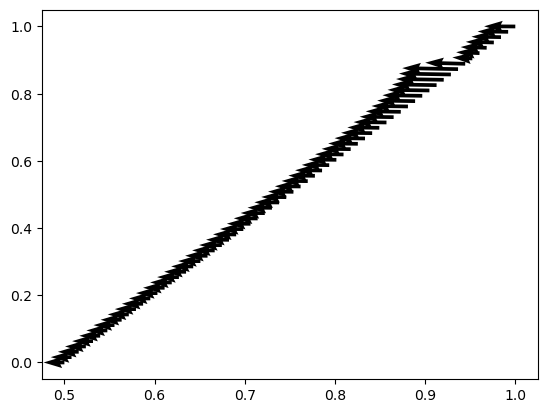

0.6069636781720378
0.18447120011633436


In [71]:
Ex_list_3d = Ex_list.reshape(len(t_values), 128,128)
print('Ez',np.size(np.real(Ez_list_3d[0][:64])))
print('Ex',np.size(np.real(Ex_list_3d[0][64,:])))

width1 = np.max(np.real(Ez_list_3d[0]))
width2 = np.max(np.real(Ex_list_3d))
X,Y = np.linspace(0.5,1,64), np.linspace(0,1,64)
print(np.size(X))
print(np.size(Y))
plt.quiver(X,Y, np.real(Ez_list_3d[0][64,:][:64]), np.real(Ex_list_3d[0][64,:][:64]))
plt.show()
print(width1)
print(width2)

(128, 128)
(64,)


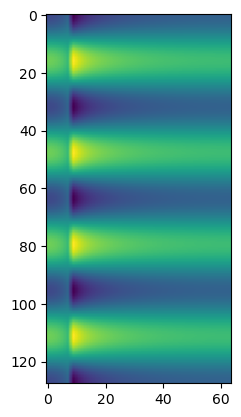

0.36894212813676647


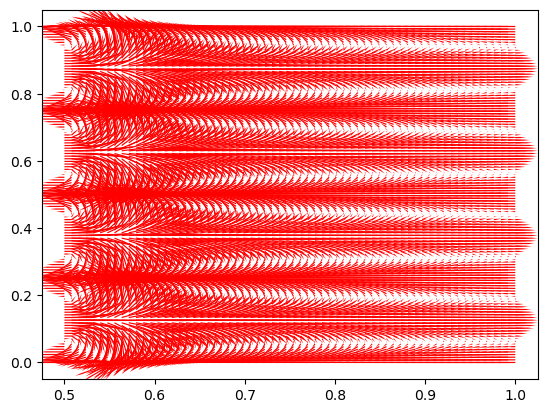

In [143]:
print(Ez_list_3d[0].shape)
print(Ez_list_3d[0][0][:64].shape)
result1 =np.array([row[64:128] for row in Ez_list_3d[0][0:128]])
result2 =np.array([row[64:128] for row in Ex_list_3d[0][0:128]])
# print(np.real(result1))
# print(result1.shape)
plt.imshow(np.real(result1))
plt.show()
factor= np.mean(np.max(np.real(result1)))
factor1 = np.mean(np.max(np.real(result2)))
s = factor1+ factor1
X, Y = np.linspace(0.5,1,64), np.linspace(0,1,128)
print(s)
plt.quiver(X,Y, np.real(result1)/np.max(np.real(result1)), np.real(result2)/np.max(np.real(result2)), color = 'red', scale =15, scale_units ='xy',headwidth = 1 )
plt.show()
# print(Ez_list_3d[0][:][:64].T.shape)
# print(Ez_list_3d[0][:128][64,:].shape)
# print(Ez_list_3d[0][:128][64,:])
# plt.imshow(np.real(Ez_list_3d[0][:][:64]))
# plt.show()
# plt.imshow(np.real(Ez_list_3d[0][:][:64].T))
# plt.show()

In [109]:
factor= np.mean(np.max(np.real(result1)))
factor1 = np.mean(np.max(np.real(result2)))
s = factor1+ factor1
print(factor)
print(factor1)
print(np.mean(s))

0.6069626736121381
0.18447106406838323
0.36894212813676647


In [150]:
X3, Y3 = np.linspace(0.5,1,64), np.linspace(0,1,128)
print(len(X3))
print(X3.size)
print(len(Y3))
print(Y3.size)


64
64
128
128
